# Análisis de Evasión de Clientes - Telecom X

Este análisis tiene como objetivo identificar patrones asociados a la evasión de clientes en la empresa Telecom X.
Se sigue el enfoque ETL (Extracción, Transformación, Carga) y se realiza un Análisis Exploratorio de Datos (EDA) utilizando **Pandas** y **Matplotlib**.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1. Cargamos el dataset

In [54]:

telecom = pd.read_json('https://raw.githubusercontent.com/DrRobert12/Desaf-o-de-Telecom-X-an-lisis-y-evasi-n-de-clientes./refs/heads/main/TelecomX_Data.json')
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


## 2. Extraemos información de las columnas anidadas

In [55]:
telecom['gender'] = telecom['customer'].apply(lambda x: x['gender'])
telecom['SeniorCitizen'] = telecom['customer'].apply(lambda x: x['SeniorCitizen'])
telecom['Partner'] = telecom['customer'].apply(lambda x: x['Partner'])
telecom['Dependents'] = telecom['customer'].apply(lambda x: x['Dependents'])
telecom['tenure'] = telecom['customer'].apply(lambda x: x['tenure'])

In [56]:
telecom['PhoneService'] = telecom['phone'].apply(lambda x: x['PhoneService'])
telecom['MultipleLines'] = telecom['phone'].apply(lambda x: x['MultipleLines'] if isinstance(x, dict) else None)

In [57]:
telecom['InternetService'] = telecom['internet'].apply(lambda x: x['InternetService'] if isinstance(x, dict) else None)
telecom['OnlineSecurity'] = telecom['internet'].apply(lambda x: x['OnlineSecurity'] if isinstance(x, dict) else None)
telecom['OnlineBackup'] = telecom['internet'].apply(lambda x: x['OnlineBackup'] if isinstance(x, dict) else None)
telecom['DeviceProtection'] = telecom['internet'].apply(lambda x: x['DeviceProtection'] if isinstance(x, dict) else None)
telecom['TechSupport'] = telecom['internet'].apply(lambda x: x['TechSupport'] if isinstance(x, dict) else None)
telecom['StreamingTV'] = telecom['internet'].apply(lambda x: x['StreamingTV'] if isinstance(x, dict) else None)
telecom['StreamingMovies'] = telecom['internet'].apply(lambda x: x['StreamingMovies'] if isinstance(x, dict) else None)

In [58]:
telecom['Contract'] = telecom['account'].apply(lambda x: x['Contract'])
telecom['PaperlessBilling'] = telecom['account'].apply(lambda x: x['PaperlessBilling'])
telecom['PaymentMethod'] = telecom['account'].apply(lambda x: x['PaymentMethod'])
telecom['MonthlyCharges'] = telecom['account'].apply(lambda x: x['Charges']['Monthly'])
telecom['TotalCharges'] = telecom['account'].apply(lambda x: x['Charges']['Total'])

## 3. Eliminamos las columnas anidadas originales

In [59]:
telecom = telecom.drop(columns=['customer', 'phone', 'internet', 'account'])


## 4. Imprimimos las primeras filas del DataFrame modificado y la información del dataset modificado



In [60]:
telecom.head()



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [61]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 



## 5. Tratamiento de duplicados


In [62]:
telecom.duplicated().sum()

np.int64(0)

## 6. Eliminar filas duplicadas


In [63]:
telecom = telecom.drop_duplicates()


In [64]:
# 5. Tratamiento de valores ausentes
telecom.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


## 7. Imputamos valores ausentes en 'TotalCharges' con 0 y convertir a numérico



In [65]:
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ', '0')
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')
telecom['TotalCharges'] = telecom['TotalCharges'].fillna(0)

## 8. Valores ausentes en otras columnas categóricas

In [66]:
for column in telecom.columns:
    if telecom[column].dtype == 'object':
        telecom[column] = telecom[column].fillna(telecom[column].mode()[0])

In [67]:
telecom.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [68]:
# Creamos la columna "Cuentas_Diarias"
telecom['Cuentas_Diarias'] = telecom['MonthlyCharges'] / 30

## 9. Convertimos valores textuales a binarios


In [69]:
telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})
telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [70]:
telecom.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.593230,64.720098,2277.182035,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


In [71]:
# Visualizamos la distribución de la variable "Churn"
churn_counts = telecom['Churn'].value_counts()
churn_counts

,count
Churn,
0.0,5174
1.0,1869


## 10 . Gráficamos

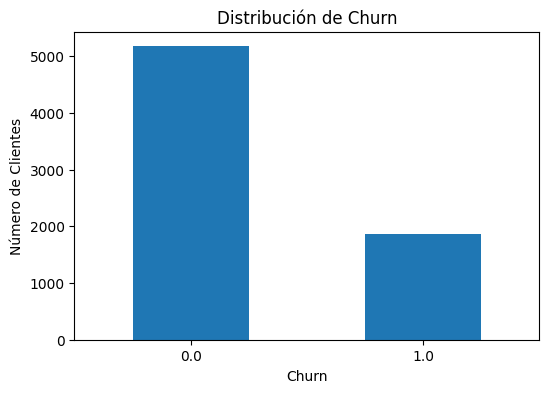


Churn por gender:
Churn        0.0       1.0
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603


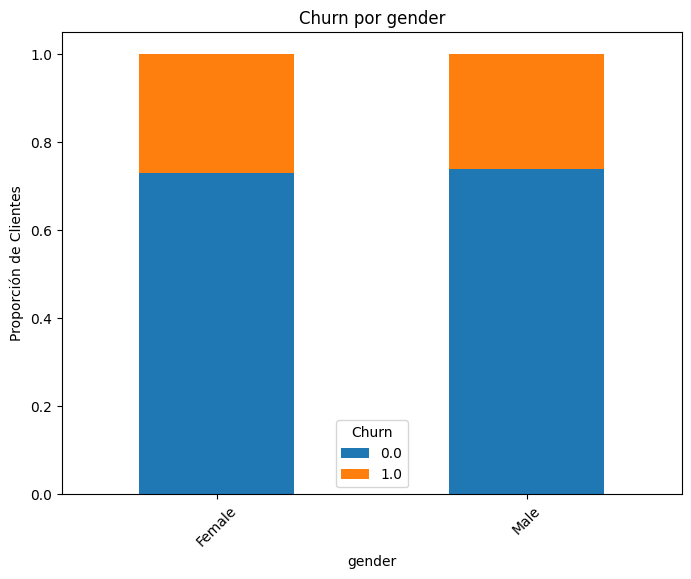


Churn por Contract:
Churn                0.0       1.0
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


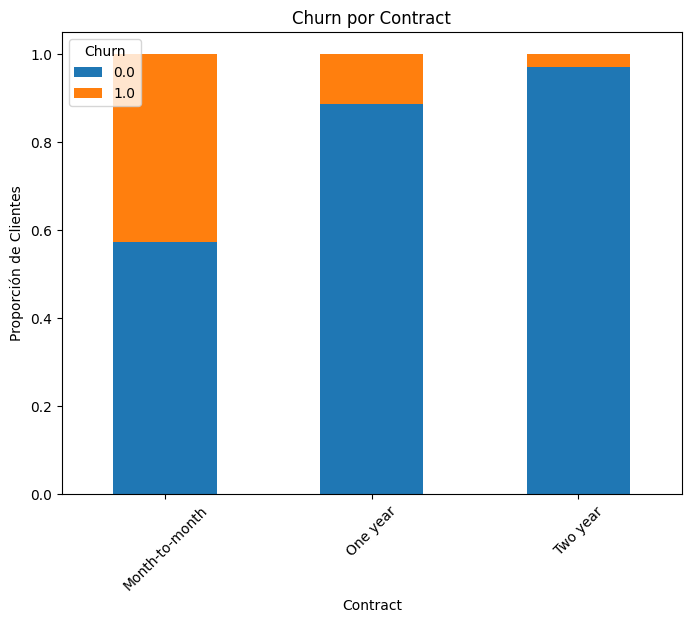


Churn por PaymentMethod:
Churn                           0.0       1.0
PaymentMethod                                
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067


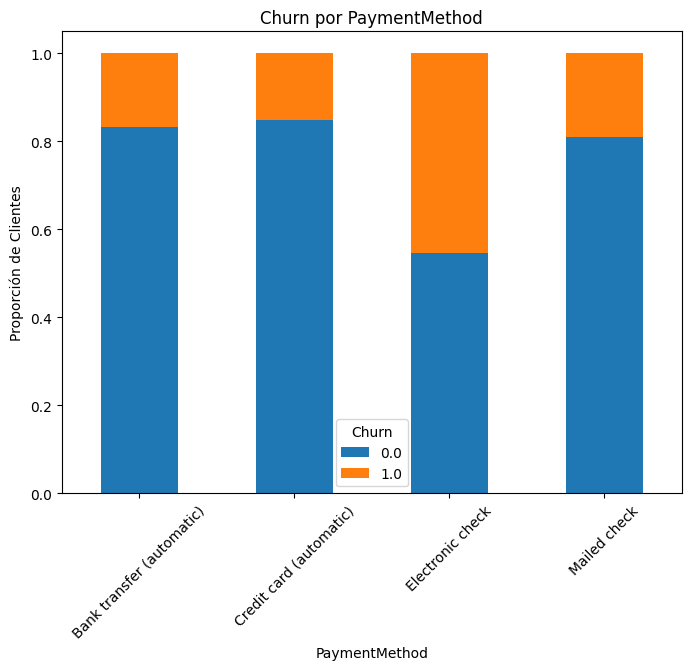


Churn por InternetService:
Churn                 0.0       1.0
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


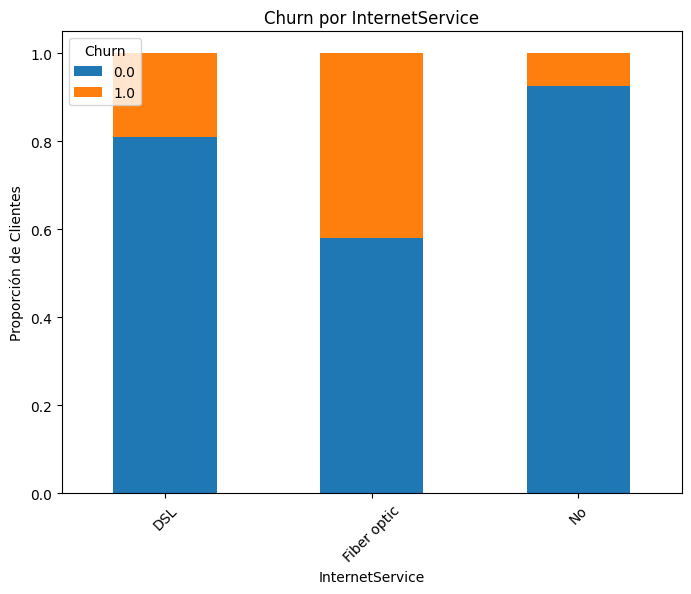


Churn por OnlineSecurity:
Churn                     0.0       1.0
OnlineSecurity                         
No                   0.582333  0.417667
No internet service  0.925950  0.074050
Yes                  0.853888  0.146112


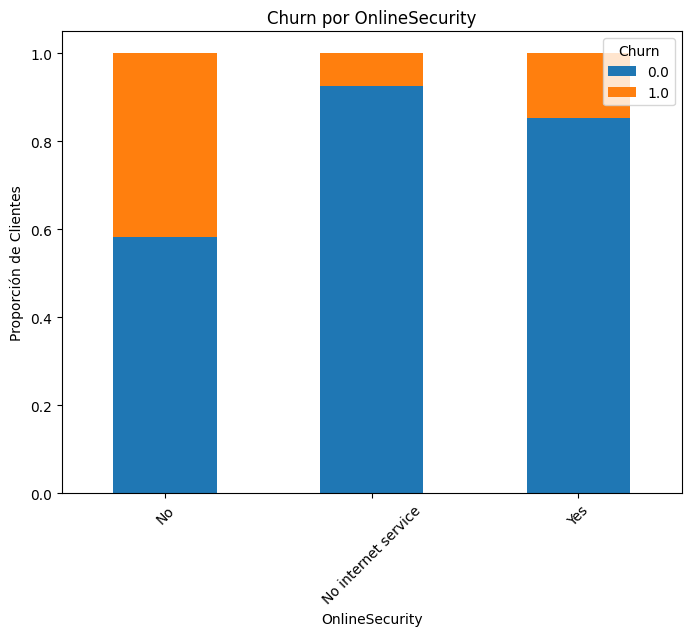


Churn por OnlineBackup:
Churn                     0.0       1.0
OnlineBackup                           
No                   0.600712  0.399288
No internet service  0.925950  0.074050
Yes                  0.784685  0.215315


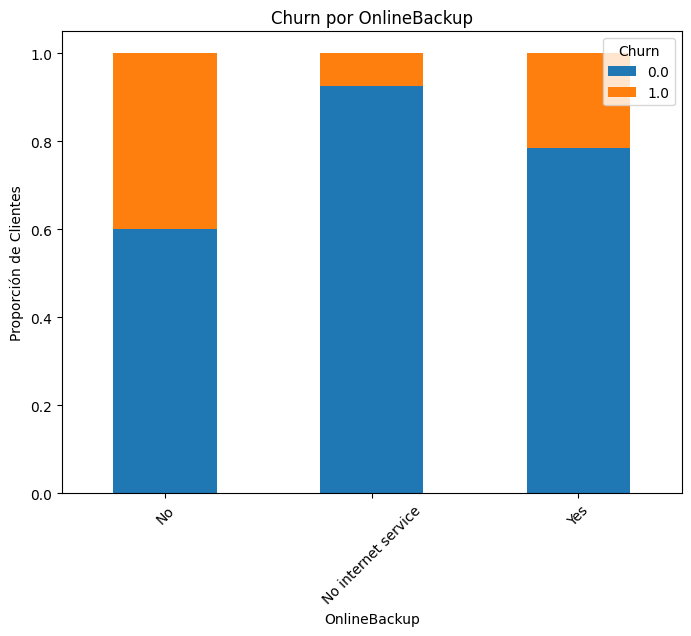


Churn por DeviceProtection:
Churn                     0.0       1.0
DeviceProtection                       
No                   0.608724  0.391276
No internet service  0.925950  0.074050
Yes                  0.774979  0.225021


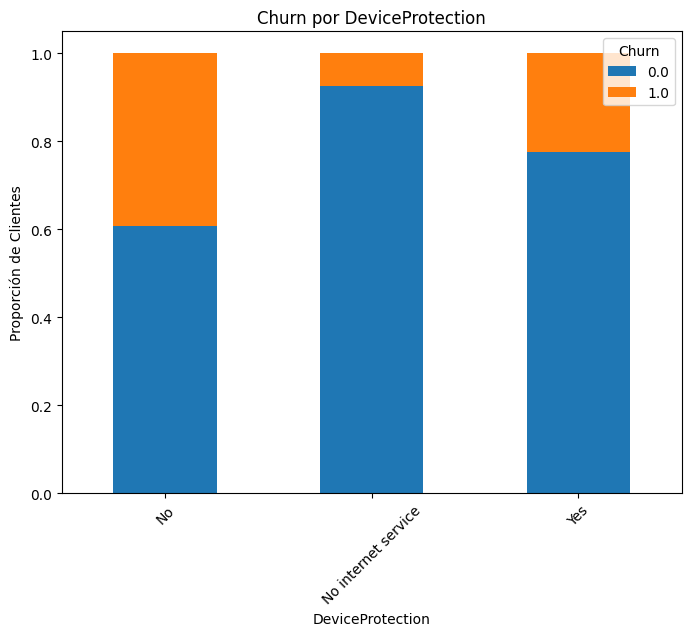


Churn por TechSupport:
Churn                     0.0       1.0
TechSupport                            
No                   0.583645  0.416355
No internet service  0.925950  0.074050
Yes                  0.848337  0.151663


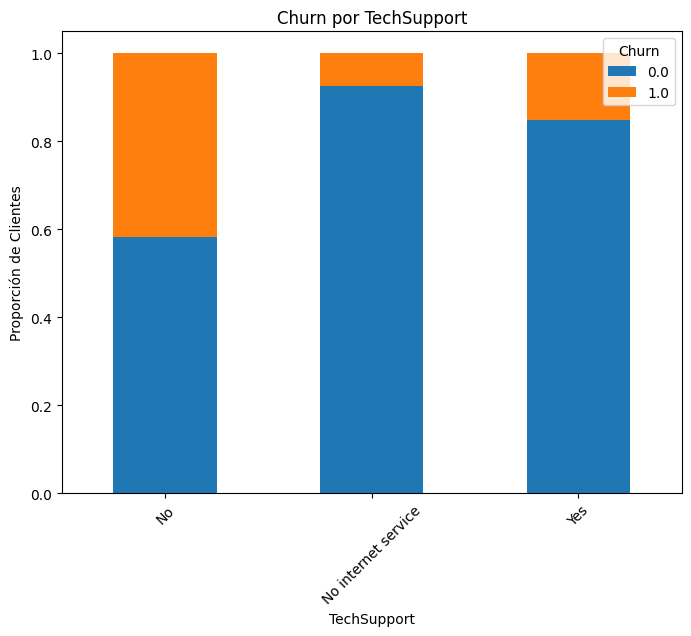


Churn por StreamingTV:
Churn                     0.0       1.0
StreamingTV                            
No                   0.664769  0.335231
No internet service  0.925950  0.074050
Yes                  0.699298  0.300702


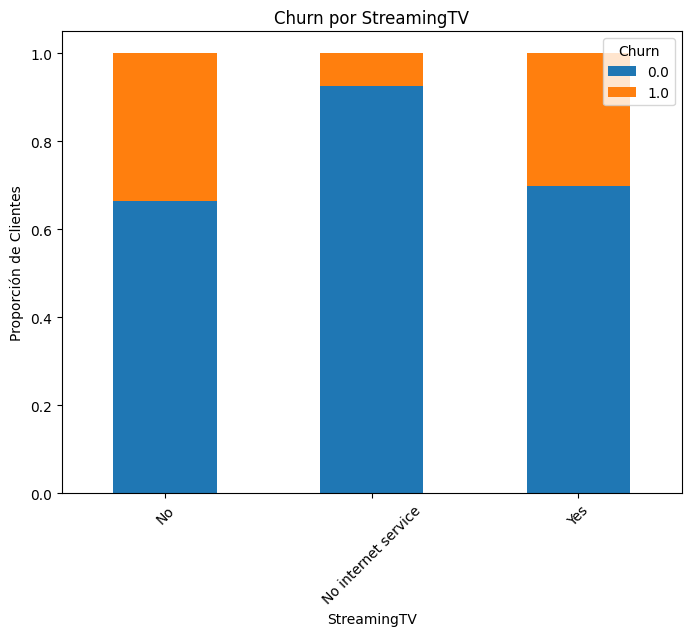


Churn por StreamingMovies:
Churn                     0.0       1.0
StreamingMovies                        
No                   0.663196  0.336804
No internet service  0.925950  0.074050
Yes                  0.700586  0.299414


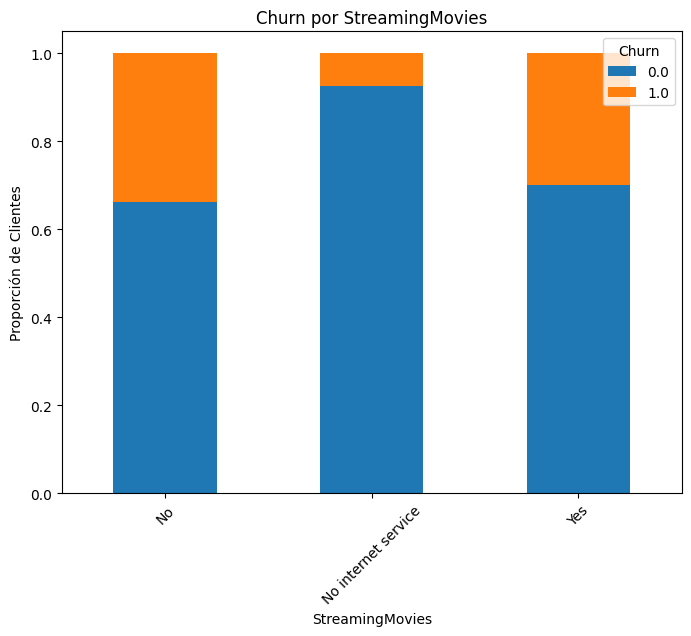

In [72]:
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar')
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()

# 10. Explorar la evasión según variables categóricas
categorical_vars = ['gender', 'Contract', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for var in categorical_vars:
    churn_by_category = telecom.groupby(var)['Churn'].value_counts(normalize=True).unstack()
    print(f"\nChurn por {var}:")
    print(churn_by_category)

    churn_by_category.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title(f'Churn por {var}')
    plt.xlabel(var)
    plt.ylabel('Proporción de Clientes')
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.show()


## 11. Explorar la evasión según variables numéricas


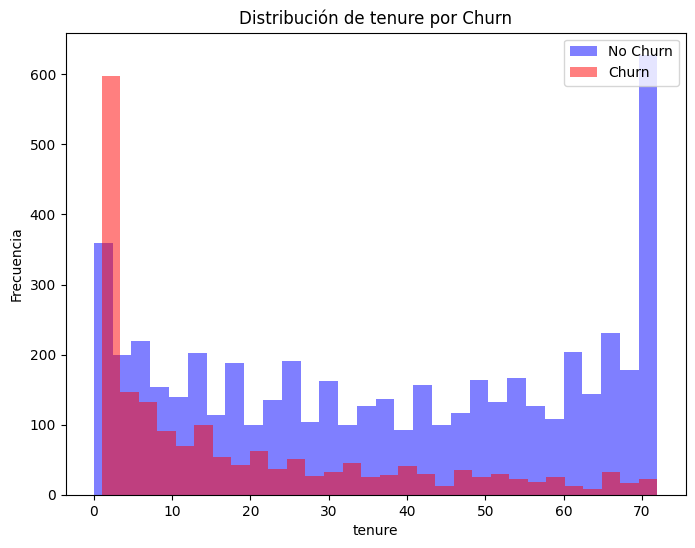

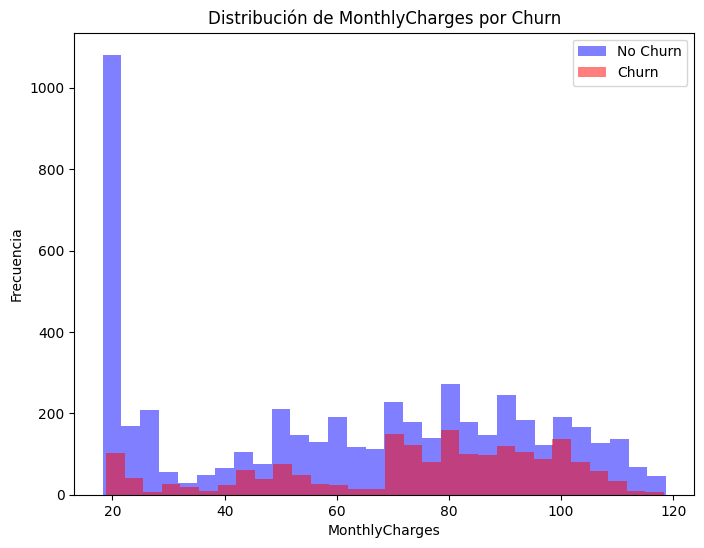

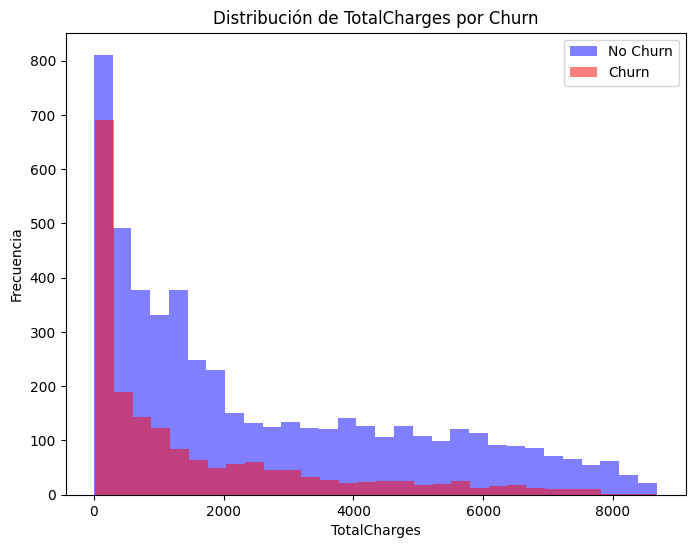

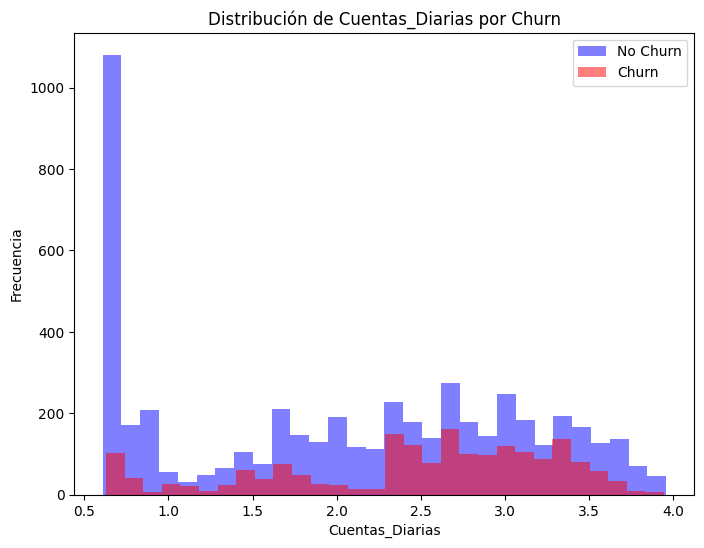

In [73]:
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias']

for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    plt.hist(telecom[var][telecom['Churn'] == 0], bins=30, alpha=0.5, label='No Churn', color='blue')
    plt.hist(telecom[var][telecom['Churn'] == 1], bins=30, alpha=0.5, label='Churn', color='red')
    plt.title(f'Distribución de {var} por Churn')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.legend(loc='upper right')
    plt.show()